In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#fix random seed for reproducibility
np.random.seed(10)

In [125]:
#import data set
url = "Adult_Census_Income_Binary_Classification_dataset.csv"
#read dataset to pandas dataframe
dataset = pd.read_csv(url)
print(dataset[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [126]:
#changing missing values to NaN
newdf = dataset.replace(r'\?', np.nan, regex=True)
print(newdf[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [127]:
#checking number of rows has at least one missing value
newdf.isnull().any(axis=1).sum()

2399

In [128]:
#removing missing values
newdf=newdf.dropna()
print(newdf[0:30])

    age          workclass      education   education-num  \
0    39          State-gov      Bachelors              13   
1    50   Self-emp-not-inc      Bachelors              13   
2    38            Private        HS-grad               9   
3    53            Private           11th               7   
4    28            Private      Bachelors              13   
5    37            Private        Masters              14   
6    49            Private            9th               5   
7    52   Self-emp-not-inc        HS-grad               9   
8    31            Private        Masters              14   
9    42            Private      Bachelors              13   
10   37            Private   Some-college              10   
11   30          State-gov      Bachelors              13   
12   23            Private      Bachelors              13   
13   32            Private     Assoc-acdm              12   
15   34            Private        7th-8th               4   
16   25   Self-emp-not-i

In [129]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [130]:
#label the categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data=newdf[' income']
le.fit(data.values)
newdf[' income']=le.transform(newdf[' income'])

In [131]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income             int64
dtype: object

In [132]:
#split and remove Y in dataset  
Y = newdf.iloc[:, -1:].values
newdf = newdf.drop(' income', 1)

In [133]:
print(newdf.columns.values)

['age' ' workclass' ' education' ' education-num' ' marital-status'
 ' occupation' ' relationship' ' race' ' sex' ' capital-gain'
 ' capital-loss' ' hours-per-week' ' native-country']


In [134]:
#one hot the categorigal variables
for col in newdf.columns.values:
    if newdf[col].dtypes=='object':
        one_hot = pd.get_dummies(newdf[col])
        one_hot = one_hot.add_prefix(col)
        newdf = newdf.join(one_hot)             #adding onehot encoded columns to dataframe
        newdf = newdf.drop(col, 1) 

In [135]:
print(newdf[0:2])

   age   education-num   capital-gain   capital-loss   hours-per-week  \
0   39              13           2174              0               40   
1   50              13              0              0               13   

    workclass Federal-gov   workclass Local-gov   workclass Private  \
0                       0                     0                   0   
1                       0                     0                   0   

    workclass Self-emp-inc   workclass Self-emp-not-inc  \
0                        0                            0   
1                        0                            1   

              ...               native-country Portugal  \
0             ...                                     0   
1             ...                                     0   

    native-country Puerto-Rico   native-country Scotland  \
0                            0                         0   
1                            0                         0   

    native-country South   na

In [136]:
newdf.dtypes

age                                           int64
 education-num                                int64
 capital-gain                                 int64
 capital-loss                                 int64
 hours-per-week                               int64
 workclass Federal-gov                        uint8
 workclass Local-gov                          uint8
 workclass Private                            uint8
 workclass Self-emp-inc                       uint8
 workclass Self-emp-not-inc                   uint8
 workclass State-gov                          uint8
 workclass Without-pay                        uint8
 education 10th                               uint8
 education 11th                               uint8
 education 12th                               uint8
 education 1st-4th                            uint8
 education 5th-6th                            uint8
 education 7th-8th                            uint8
 education 9th                                uint8
 education A

In [137]:
#split dataset into its attributes and labels
X = newdf.values

In [138]:
print(X[0:2])

[[  39   13 2174    0   40    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0]
 [  50   13    0    0   13    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0

In [139]:
#normalize features
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
scalar.fit(X)

X = scalar.transform(X)

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
print(X[0:2])

[[0.30136986 0.8        0.02174022 0.         0.39795918 0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [141]:
#training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [142]:
#define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=103,kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [143]:
#fit the model
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto')
weights=model.get_weights()
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=1000,callbacks = [early_stopping])

Train on 19303 samples, validate on 4826 samples
Epoch 1/1000
19303/19303 [==============================] - 1s 47us/step - loss: 0.4823 - acc: 0.7684 - val_loss: 0.4060 - val_acc: 0.8145
Epoch 2/1000
19303/19303 [==============================] - 1s 33us/step - loss: 0.3955 - acc: 0.8179 - val_loss: 0.3771 - val_acc: 0.8286
Epoch 3/1000
19303/19303 [==============================] - 1s 34us/step - loss: 0.3769 - acc: 0.8259 - val_loss: 0.3666 - val_acc: 0.8301
Epoch 4/1000
19303/19303 [==============================] - 1s 34us/step - loss: 0.3686 - acc: 0.8294 - val_loss: 0.3608 - val_acc: 0.8305
Epoch 5/1000
19303/19303 [==============================] - 1s 38us/step - loss: 0.3635 - acc: 0.8302 - val_loss: 0.3574 - val_acc: 0.8307
Epoch 6/1000
19303/19303 [==============================] - 1s 35us/step - loss: 0.3601 - acc: 0.8310 - val_loss: 0.3548 - val_acc: 0.8334
Epoch 7/1000
19303/19303 [==============================] - 1s 35us/step - loss: 0.3575 - acc: 0.8312 - val_loss: 0.3

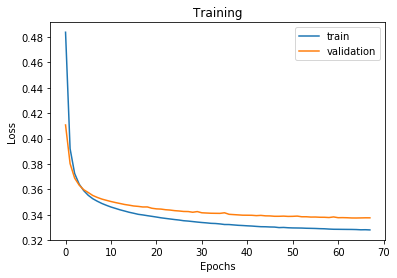

In [25]:
# Plot history of loss and validation loss against epoch
plt.plot(np.array(history.history['loss']), label="train")
plt.plot(np.array(history.history['val_loss']), label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.legend()
plt.show()

In [26]:
# Test the trained model on the test set
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.34944469418352603
Test accuracy: 0.8395491464110763


In [58]:
#Predict
y_pred = model.predict_classes(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred)) 

[[4114  346]
 [ 622  951]]
             precision    recall  f1-score   support

          0       0.87      0.92      0.89      4460
          1       0.73      0.60      0.66      1573

avg / total       0.83      0.84      0.83      6033

